<a href="https://colab.research.google.com/github/prasadps2000/Mini-Project/blob/main/Minor_Project(Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!mkdir images

In [1]:
#Preprocessing data

import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

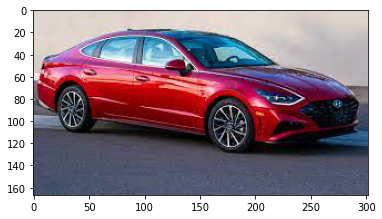

In [2]:
# Displaying the image
img = plt.imread('/content/drive/MyDrive/Minor Project(Smartknower)/images/car/download (1).jpg')
plt.imshow(img)

In [3]:
img.shape

(167, 302, 3)

In [4]:
import os
import numpy as np
datadir='/content/drive/MyDrive/Minor Project(Smartknower)/images'

categories=['bike','car']
target=[]
flat_data=[]

for i in categories:
  class_num=categories.index(i)#Label encoding the values
  #print(class_num)
  path=os.path.join(datadir,i)#create path to use all the images
  #print(path)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #plt.imshow(img_array)
    #plt.show()
    img_resize=resize(img_array,(150,150,3))#value gets converted 0-1 from 0-255(normalizes to 0 to 1)
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)

In [5]:
df=pd.DataFrame(flat_data)
target=np.array(target)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67460,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.047480,0.051402,0.020029,0.065490,0.069412,0.038039,0.089297,0.093219,0.061765,0.110598,0.114520,0.083147,0.117451,0.121373,0.090000,0.121176,0.125098,0.093725,0.133967,0.137889,0.103987,0.145588,0.149510,0.118137,0.130284,0.134206,0.102833,0.114575,0.118497,0.087124,0.098627,0.102549,0.071176,0.086340,0.090261,0.058889,0.112157,0.116078,0.084706,0.128814,...,0.391000,0.365490,0.361569,0.381176,0.357209,0.353288,0.372895,0.390696,0.386775,0.406382,0.388817,0.384895,0.404503,0.363876,0.359954,0.379562,0.376275,0.372353,0.391961,0.328833,0.324912,0.344520,0.354297,0.350376,0.369984,0.315304,0.311382,0.330990,0.405990,0.402069,0.421676,0.353725,0.349804,0.369412,0.346294,0.342373,0.361980,0.325078,0.321157,0.340765
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078
4,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.921561,0.921569,0.921569,0.921569,0.922261,0.922261,0.922261,0.925490,0.925490,0.925490,0.929412,0.929412,0.929412,0.933163,0.933163,0.933163,0.935490,0.935490,0.935490,0.937817,0.937817,0.937817,0.941176,0.941176,0.941176,0.941176,0.941176,0.941176,0.944797,0.944797,0.944797,0.950634,0.950634,0.950634,0.953373,0.953373,0.953373,0.956863,0.956863,0.956863


In [6]:
len(flat_data[0])

67500

In [7]:
150*150*3

67500

In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

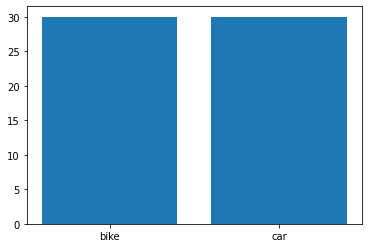

In [9]:
unique,count=np.unique(target,return_counts=True)
plt.bar(categories,count)

In [10]:
#Split the data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}          
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [13]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [16]:
accuracy_score(y_pred,y_test)

1.0

In [17]:
confusion_matrix(y_pred,y_test)

array([[11,  0],
       [ 0,  7]])

In [18]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [19]:
#Save the model using pickle library

import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [20]:
model=pickle.load(open('img_model.p','rb'))

Enter your urlhttps://img.gaadicdn.com/images/carexteriorimages/630x420/Audi/RS-Q8/7943/1598516299283/front-left-side-47.jpg
(420, 630, 3)
Predicted output :car


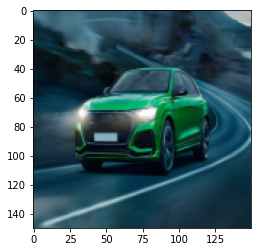

In [33]:
#Testing a brand new image

flat_data=[]
url=input("Enter your url")
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=categories[y_out[0]]
print(f'Predicted output :{y_out}')

In [23]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok


     |████████████████████████████████| 8.2MB 5.3MB/s 
     |████████████████████████████████| 112kB 52.0MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 163kB 56.7MB/s 
     |████████████████████████████████| 4.2MB 45.7MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 122kB 49.4MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.


In [34]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image classifier Using machine learning')
st.text("Upload the image")
model=pickle.load(open('img_model.p','rb'))

uploaded_file=st.file_uploader("Choose an image...",type="jpg")
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='Uploaded image')

  if st.button('PREDICT'):
    categories=['bike','car']
    st.write('Result...')
    flat_data=[]
    img=np.array(img)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    y_out=model.predict(flat_data)
    y_out=categories[y_out[0]]
    st.write(f'Predicted output :{y_out}')


Overwriting app.py


In [25]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://af311accd1e7.ngrok.io'